<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/knn_nb_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

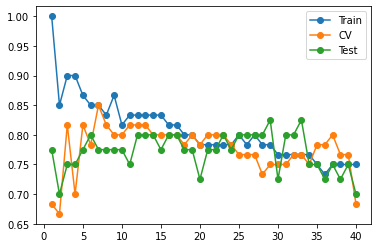

0.8

In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data06_iris2.csv')
X = df.iloc[:,:-1]
Y = df['Species']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=0) 

# KNN
from sklearn.neighbors import KNeighborsClassifier
f = KNeighborsClassifier(3)
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# parameter tunning
from sklearn.model_selection import cross_val_score
s = np.zeros((40,3))
for n in range(s.shape[0]):
    f = KNeighborsClassifier(n+1)
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)
    
plt.plot(np.arange(1,41),s,marker='o')
plt.legend(('Train','CV','Test'))
plt.show()

# naive bayesian
from sklearn.naive_bayes import GaussianNB

f = GaussianNB()
f.fit(xtrain,ytrain)
ytrain_hat = f.predict(xtrain)
ytest_hat = f.predict(xtest)

pd.crosstab(ytrain,ytrain_hat)
pd.crosstab(ytest,ytest_hat)

f.score(xtrain,ytrain)
f.score(xtest,ytest)